In [247]:
import nltk
import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd

In [248]:
train = pd.read_csv("train_E6oV3lV.csv")
test = pd. read_csv("test_tweets_anuFYb8.csv")

In [249]:
test.tail()

,id,tweet
17192,49155,thought factory: left-right polarisation! #tru...
17193,49156,feeling like a mermaid ð #hairflip #neverre...
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...
17195,49158,"happy, at work conference: right mindset leads..."
17196,49159,"my song ""so glad"" free download! #shoegaze ..."


In [250]:
print(f'Training data shape {train.shape}')
print(f'Testing data shape {test.shape}')

Training data shape (31962, 3)
Testing data shape (17197, 2)


Labels are missing in testing data hence, we will move forward with only training data. We will train the model by splitting the training data into train and test sets.

# Checking Positive and Negative Tweets

In [280]:
train_positive = train[train.label==0]
train_negative = train[train['label']==1]

print(f'Train positive shape {train_positive.shape}')
print(f'Train negative shape {train_negative.shape}')

Train positive shape (29720, 4)
Train negative shape (2242, 4)


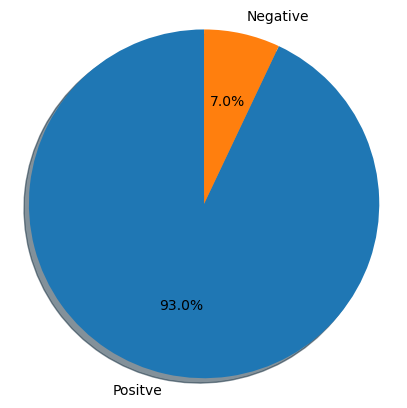

In [281]:
fig = plt.figure(figsize=(5,5))
labels = ['Positve', 'Negative']
# print(type(labels))
sizes = [train_positive.shape[0], train_negative.shape[0]]
plt.pie(sizes,labels=labels, autopct = '%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()

Hence, the data is highly imbalanced and we need to perform under/over sampling.


In [253]:
# Checking null values
print(train.isnull().sum())
# print(train.isna().sum())

id       0
label    0
tweet    0
dtype: int64


In [254]:
# printing a random tweet
print(list(train_positive.sample().tweet))
print(list(train_negative.sample().tweet))

["suspected henrico #vandal's #mother: #'my #son isn't ' - dec 31 @ 9:46 pm et  "]
['keep your face to the sunshine and you cannot see the shadow--helen keller   #outsideâ\x80¦ ']


# Pre-processing

The data needs to be cleaned by removing urls emoticons or any random characters which doesnt make sense.
Data preprocessing is one of the critical steps in any machine learning project. It includes cleaning and formatting the data before feeding into a machine learning algorithm. For NLP, the preprocessing steps are comprised of the following tasks:

* Tokenizing the string
* Lowercasing
* Removing stop words and punctuation
* Stemming


In [255]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/a91946/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Selecting a random tweet and performing cleaning (example)

In [299]:
random.seed(300)
rand_val = np.random.randint(0,2242)
tweet= train.loc[rand_val].tweet

# tweet= train[['tweet']].iloc[rand_val]
print(tweet)

#model   i love u take with u all the time in urð±!!! ððððð¦ð¦ð¦  


In [296]:
import re
import string

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer

# Remove special characters, URLs etc.

In [303]:
print('\033[92m' + tweet)
# print('\033[94m')

# remove old style retweet text "RT"
tweet2 = re.sub(r'^RT[\s]+','',tweet)

# remove urls
tweet2 = re.sub(r'https?://[^\s\n\r]+','',tweet2)

#remove hashtags
tweet2 = re.sub(r'#','',tweet2)
tweet2 = re.sub(r'ð','',tweet2)

re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])", " ",tweet2)
print(tweet2)

#model   i love u take with u all the time in urð±!!! ððððð¦ð¦ð¦  
model   i love u take with u all the time in ur±!!! ¦¦¦  


# Tokenize

In [259]:
tokenizer = TweetTokenizer(preserve_case=False, reduce_len=True, strip_handles=True)
tweet_token = tokenizer.tokenize(tweet2)

print(tweet_token)

['fellowship', '.', 'ð', '\x9f', '\x98', '\x8a', 'lifegroup']


# Remove stopwords and punctuations

In [260]:
stopwords_english = stopwords.words('english')

print('Stop words\n')
print(stopwords_english)

print('\nPunctuation\n')
print(string.punctuation)

Stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

In [261]:
clean_tweet = []

for word in tweet_token:
    if (word not in stopwords_english and
            word not in string.punctuation):
        clean_tweet.append(word)

print(clean_tweet)

['fellowship', 'ð', '\x9f', '\x98', '\x8a', 'lifegroup']


# Stemming

In [262]:
stemmer = PorterStemmer()

stem_tweet=[]

for word in clean_tweet:
    stem_tweet.append(stemmer.stem(word.lower()))

print(stem_tweet)

['fellowship', 'ð', '\x9f', '\x98', '\x8a', 'lifegroup']


In this way we can perform preprocessing for every tweet.

# Preprocessing function

In [263]:
def process_tweet(tweet):
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    tokenizer = TweetTokenizer(preserve_case=False, reduce_len=True, strip_handles=True)

    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks
    tweet = re.sub(r'https?://[^\s\n\r]+', '', tweet)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)

    tweet_token = tokenizer.tokenize(tweet)
    clean_tweet=[]
    for word in tweet_token:
        if (word not in stopwords_english and
                word not in string.punctuation):
            clean_tweet.append(stemmer.stem(word.lower()))

    return clean_tweet

In [264]:
#processing all tweets

train['processed_tweet'] = train['tweet'].apply(process_tweet)
print(train.head())


   id  label                                              tweet  \
0   1      0   @user when a father is dysfunctional and is s...   
1   2      0  @user @user thanks for #lyft credit i can't us...   
2   3      0                                bihday your majesty   
3   4      0  #model   i love u take with u all the time in ...   
4   5      0             factsguide: society now    #motivation   

                                     processed_tweet  
0  [father, dysfunct, selfish, drag, kid, dysfunc...  
1  [thank, lyft, credit, can't, use, caus, offer,...  
2                                  [bihday, majesti]  
3  [model, love, u, take, u, time, urð, , , ±, ...  
4                        [factsguid, societi, motiv]  


# Counting unique words in tweets

In [265]:
freq_count=dict()

# for tweet in train['processed_tweet']:
#     for word in tweet:
#         if word not in freq_count.keys():
#             freq_count[word] = 1
#
#         else:
#             freq_count[word]+=1
#
# print(len(freq_count))

# create dictionary based on positive negative tweets
for y, tweet in zip(train['label'], train['processed_tweet']):
    for word in tweet:
        pair=(word,y)
        if pair not in freq_count.keys():
            freq_count[pair] = 1

        else:
            freq_count[pair]+=1

# print(len(freq_count))

Total 36691 unique elements

In [266]:
positv = pd.DataFrame(columns = ['word', 'count'])
negatv = pd.DataFrame(columns = ['word', 'count'])
pos_neg = pd.DataFrame(columns = ['word', 'count'])

for key, value in freq_count.items():
    if key[1]==1:
        positv.loc[len(positv.index)] = [key[0], value]
    else:
        negatv.loc[len(negatv.index)] = [key[0], value]

    if key[0] in pos_neg['word']:
        pos_neg[pos_neg['word']==key[0]].count+= value
    else:
        pos_neg.loc[len(pos_neg.index)] = [key[0], value]




In [279]:
positv.sort_values(by='count', inplace=True, ascending=False)
negatv.sort_values(by='count', inplace=True, ascending=False)
pos_neg.sort_values(by='count', inplace=True, ascending=False)

negatv.head()

,word,count
26,,17082
29,ð,15600
30,,7207
55,,5715
36,¦,5282


In [268]:
import seaborn as sns

Text(0.5, 1.0, 'Most frequent words in Positive tweets')

/Users/a91946/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/a91946/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 159 (\x9f) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/a91946/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 152 (\x98) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/a91946/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 153 (\x99) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


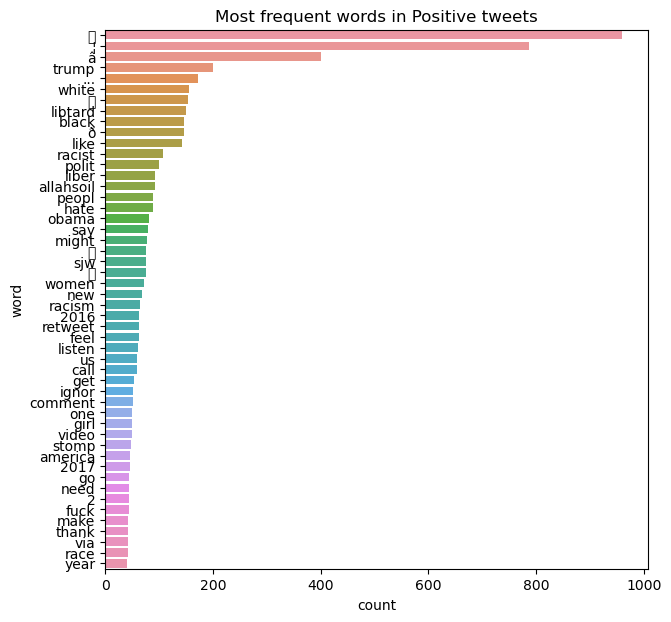

In [272]:
plt.figure(figsize=(7,7))
sns.barplot(data=positv.iloc[:50], x= 'count', y= 'word')
plt.title('Most frequent words in Positive tweets')


Text(0.5, 1.0, 'Most frequent words in Negative tweets')

/Users/a91946/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 159 (\x9f) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/a91946/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 152 (\x98) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/a91946/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/a91946/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/a91946/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 143 (\x8f) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


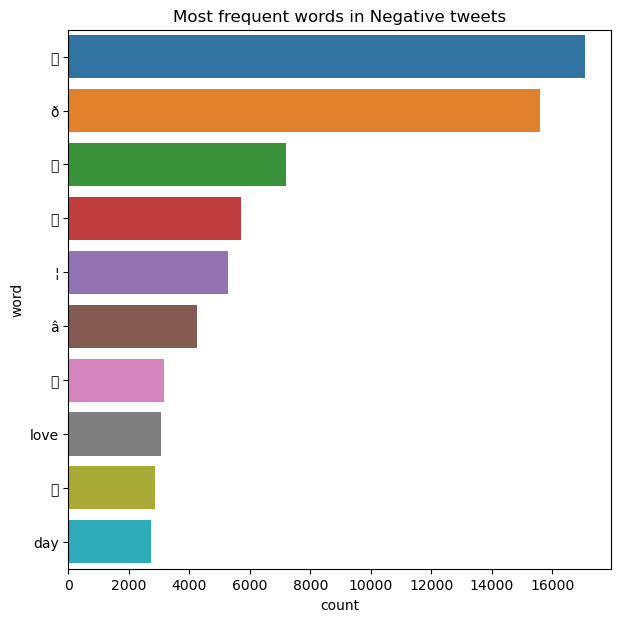

In [276]:
plt.figure(figsize=(7,7))
sns.barplot(data=negatv.head(10), x= 'count', y= 'word')
plt.title('Most frequent words in Negative tweets')

Text(0.5, 1.0, 'Most frequent words in all the tweets')

/Users/a91946/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 159 (\x9f) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/a91946/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 152 (\x98) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/a91946/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/a91946/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/a91946/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 143 (\x8f) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


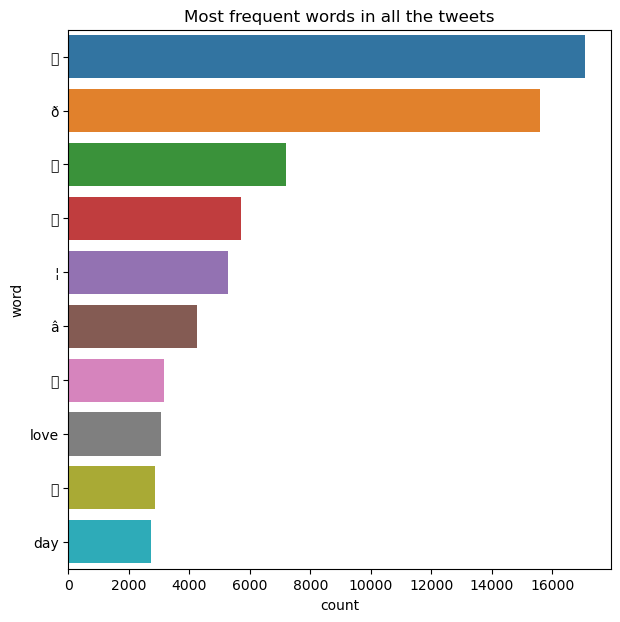

In [282]:
plt.figure(figsize=(7,7))
sns.barplot(data=pos_neg.head(10), x= 'count', y= 'word')
plt.title('Most frequent words in all the tweets')

In [270]:
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(training_data["processed_tweets"], training_data["label"], test_size = 0.2, random_state = 42)